<a href="https://www.kaggle.com/code/jbertucci/mvp-3-anls-dt?scriptVersionId=198173804" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# MVP 3_Análise de Dados e Boas Práticas (40530010055_20240_01)


[Acesse o notebook no Google Colab](https://colab.research.google.com/drive/1AXB6JS2hgCd7eTk7FOqBTEJ1749z6tXR?usp=sharing)

# Sumário
><p style="font-size: 24px; text-indent: 40px; text-align: justify;">
Neste notebook, foi realizado um estudo aprofundado para analisar o comportamento de clientes em campanhas de marketing, identificar padrões de gasto e prever a probabilidade de churn. Utilizei uma série de técnicas de análise estatística, incluindo análises de variância (ANOVA), regressão logística e avaliação de desempenho dos modelos por meio de matrizes de confusão e relatórios de classificação. O objetivo final foi propor melhorias nas estratégias de marketing com base nos dados analisados.</p>

### Descrição Dataset
><p style="font-size: 20px;text-indent: 20px;text-align: justify;"> O dataset contém dados de marketing com informações sobre compras de produtos alimentícios, como vinhos, carnes, frutas, peixes, entre outros, além de características demográficas dos clientes, como renda, número de filhos, nível de educação e estado civil.</p>

# Objetivo Dataset
><p style="font-size: 20px;text-indent: 20px;text-align: justify;">Analisar o comportamento de compra dos clientes em relação aos diferentes canais, identificar os fatores que impactam os gastos e a aceitação de campanhas de marketing, e compreender como características demográficas (como renda e estado civil) e comportamentais (hábitos de consumo) influenciam essas decisões. A meta é usar esses insights para prever a probabilidade de aceitação das campanhas, otimizando as estratégias de marketing para aumentar a eficácia e o engajamento dos clientes.</p>

# Questões solicitadas pelo Marketing a serem respondidas:

### 1. Quais canais de compra apresentam maior volume e como isso se relaciona com a aceitação das campanhas?
### 2. Qual é o impacto da renda nos gastos totais dos clientes?
### 3. Existem diferenças significativas no comportamento de compra entre os diferentes estados civis?
### 4. Quais fatores demográficos e comportamentais influenciam a aceitação de campanhas de marketing, e como prever a probabilidade de aceitação dos clientes?
### 5. Quais melhorias podem ser propostas para as campanhas de marketing com base nos insights obtidos?




### *Vamos seguir agora com os passos para Análise.*

# ETL (Extração, Transformação e Carregamento)

### 1. Importação DB proveniente do Kaggle e visualização ".head" e ".info"

In [1]:
import os
os.listdir('/kaggle/input/')

['marketing-data']

In [2]:
import os
import pandas as pd

# Listar os arquivos no diretório de entrada para verificar a presença do dataset
print("Verificando os arquivos disponíveis no diretório de entrada:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Definir o caminho para o arquivo de entrada do dataset
file_path = '/kaggle/input/marketing-data/ifood_df.csv'

# Ler o arquivo CSV e carregar os dados em um DataFrame
df = pd.read_csv(file_path)

# Exibir informações gerais do DataFrame para verificar o carregamento correto
print("Informações gerais do DataFrame:")
print(df.info())

# Visualizar as primeiras linhas do DataFrame para garantir que os dados foram importados corretamente
df.head()


Verificando os arquivos disponíveis no diretório de entrada:
/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png
Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### 2. Tratamento dos Dados

- **Verificação dos nomes das colunas**
  - O código exibe os nomes das colunas do DataFrame para identificar possíveis inconsistências.

- **Remoção de espaços extras nos nomes das colunas**
  - Remove espaços em branco nos nomes das colunas para evitar problemas de referência e garantir que os nomes estejam consistentes.

- **Definição das colunas booleanas**
  - Uma lista de colunas que devem ser convertidas para o tipo booleano é criada (colunas que possuem valores 1 = True, 0 = False).

- **Verificação da existência das colunas booleanas**
  - O código verifica se todas as colunas listadas na variável `boolean_columns` existem no DataFrame e, caso alguma esteja faltando, informa o nome da coluna ausente.

- **Conversão das colunas booleanas**
  - Se todas as colunas estiverem presentes, elas são convertidas para o tipo booleano (`bool`), garantindo que os valores 1 e 0 sejam tratados como verdadeiro ou falso.

- **Exibição do resumo e das primeiras linhas do DataFrame**
  - Após as alterações, o código exibe um resumo atualizado do DataFrame e as primeiras linhas para confirmar que as mudanças foram aplicadas corretamente.


In [3]:
# Exibir os nomes das colunas do DataFrame para verificar possíveis inconsistências
print("Nomes das colunas antes da correção:")
print(df.columns)

# Remover espaços extras dos nomes das colunas para garantir consistência
df.columns = df.columns.str.strip()

# Definir as colunas que devem ser convertidas para o tipo booleano
boolean_columns = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
    'AcceptedCmp2', 'Complain', 'Response', 'marital_Divorced', 
    'marital_Married', 'marital_Single', 'marital_Together', 
    'marital_Widow', 'education_2n Cycle', 'education_Basic', 
    'education_Graduation', 'education_Master', 'education_PhD'
]

# Verificar se todas as colunas booleanas estão presentes no DataFrame
missing_columns = [col for col in boolean_columns if col not in df.columns]
if missing_columns:
    print(f"As seguintes colunas estão faltando: {missing_columns}")
else:
    # Converter as colunas para o tipo booleano
    df[boolean_columns] = df[boolean_columns].astype('bool')
    print("Todas as colunas booleanas foram convertidas com sucesso.")

# Exibir o resumo do DataFrame para confirmar as alterações
print("Informações do DataFrame após as correções:")
print(df.info())

# Visualizar as primeiras linhas do DataFrame para garantir que os ajustes foram aplicados
df.head()


Nomes das colunas antes da correção:
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')
Todas as colunas booleanas foram convertidas com sucesso.
Informações do DataFrame após as correções:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,True,False,False,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,True,False,False,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,False,False,False,True,407,392,0


### Conversão de colunas monetárias para o formato correto

- Define as colunas monetárias que precisam estar no formato numérico (`float`) e converte-as, se necessário, usando `pd.to_numeric`.

### Verificação das primeiras linhas das colunas monetárias

- Exibe as primeiras linhas das colunas monetárias para confirmar que a conversão foi realizada corretamente.

### Verificação e conversão das colunas booleanas

- Verifica e, se necessário, converte as colunas booleanas para o tipo `bool`, assegurando a correta interpretação dos valores.

### Exibição dos tipos de dados e resumo do DataFrame

- Confirma as conversões realizadas e exibe um resumo final do DataFrame para garantir que todas as alterações foram aplicadas com sucesso.


In [4]:
# Definir as colunas monetárias que devem estar no formato numérico (float)
monetary_columns = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'MntTotal', 'MntRegularProds'
]

# Converter colunas monetárias para float, ajustando valores inconsistentes para NaN
df[monetary_columns] = df[monetary_columns].apply(pd.to_numeric, errors='coerce')

# Exibir as primeiras linhas das colunas monetárias para verificar a conversão
print("Primeiras linhas das colunas monetárias convertidas:")
print(df[monetary_columns].head())

# Verificar se as colunas booleanas estão corretamente configuradas como booleano
print("Tipos das colunas booleanas após verificação:")
print(df[boolean_columns].dtypes)

# Confirmar e ajustar o tipo booleano das colunas booleanas, se necessário
if not all(df[boolean_columns].dtypes == 'bool'):
    print("Convertendo colunas booleanas para o tipo correto...")
    df[boolean_columns] = df[boolean_columns].astype('bool')

# Exibir tipos de dados atualizados do DataFrame
print("Tipos de dados do DataFrame após as alterações:")
print(df.dtypes)

# Exibir resumo atualizado do DataFrame para confirmar mudanças
print("Resumo do DataFrame atualizado:")
print(df.info())
df.head()


Primeiras linhas das colunas monetárias convertidas:
    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       635         88              546              172   
1  46344.0        11          1                6                2   
2  71613.0       426         49              127              111   
3  26646.0        11          4               20               10   
4  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds  MntTotal  MntRegularProds  
0                88            88      1529             1441  
1                 1             6        21               15  
2                21            42       734              692  
3                 3             5        48               43  
4                27            15       407              392  
Tipos das colunas booleanas após verificação:
AcceptedCmp3            bool
AcceptedCmp4            bool
AcceptedCmp5            bool
AcceptedCmp1         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,True,False,False,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,True,False,False,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,False,False,False,True,407,392,0


### Tratamento - Formatação monetária.
-  Este bloco formata as colunas monetárias para exibição, adicionando 'R$' sem alterar os dados originais, que permanecem numéricos para cálculos futuros.

In [5]:
# Função para formatar valores monetários com 'R$' para fins de visualização
def formatar_valor(valor):
    """Adiciona o símbolo 'R$' aos valores para visualização sem alterar o DataFrame original."""
    return f"R$ {valor:,.2f}"

# Aplicar a formatação nas colunas monetárias e exibir para verificação
print("Visualização das colunas monetárias formatadas com 'R$':")
df_monetary_formatted = df[monetary_columns].applymap(formatar_valor)
print(df_monetary_formatted.head())

# Nota: O DataFrame original permanece inalterado, com valores numéricos adequados para cálculos futuros.


Visualização das colunas monetárias formatadas com 'R$':
         Income   MntWines MntFruits MntMeatProducts MntFishProducts  \
0  R$ 58,138.00  R$ 635.00  R$ 88.00       R$ 546.00       R$ 172.00   
1  R$ 46,344.00   R$ 11.00   R$ 1.00         R$ 6.00         R$ 2.00   
2  R$ 71,613.00  R$ 426.00  R$ 49.00       R$ 127.00       R$ 111.00   
3  R$ 26,646.00   R$ 11.00   R$ 4.00        R$ 20.00        R$ 10.00   
4  R$ 58,293.00  R$ 173.00  R$ 43.00       R$ 118.00        R$ 46.00   

  MntSweetProducts MntGoldProds     MntTotal MntRegularProds  
0         R$ 88.00     R$ 88.00  R$ 1,529.00     R$ 1,441.00  
1          R$ 1.00      R$ 6.00     R$ 21.00        R$ 15.00  
2         R$ 21.00     R$ 42.00    R$ 734.00       R$ 692.00  
3          R$ 3.00      R$ 5.00     R$ 48.00        R$ 43.00  
4         R$ 27.00     R$ 15.00    R$ 407.00       R$ 392.00  


/tmp/ipykernel_17/2786742195.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_monetary_formatted = df[monetary_columns].applymap(formatar_valor)


### Tratamento - Verificar valores nulos.
-  Exibe a quantidade de valores nulos por coluna
-  Calcula e exibe a porcentagem de valores nulos para cada coluna, permitindo uma análise mais detalhada sobre a integridade dos dados.

In [6]:
# Verificar a presença de valores nulos em cada coluna do DataFrame
print("Contagem de valores nulos por coluna:")
print(df.isnull().sum())

# Exibir a porcentagem de valores nulos para uma análise detalhada da qualidade dos dados
print("\nPorcentagem de valores nulos por coluna:")
print((df.isnull().sum() / len(df)) * 100)


Contagem de valores nulos por coluna:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0


*O resultado indica que não há valores nulos nas colunas do DataFrame, garantindo que os dados estejam completos e prontos para análise sem necessidade de tratamento adicional para valores ausentes.*

# Análise Exploratória de Dados (EDA):

## Análise de distribuição das variáveis numéricas:
Usarei histogramas para visualizar a distribuição das principais variáveis numéricas, como renda e valores gastos.

- Boxplot das Colunas Monetárias para Identificação de Outliers 

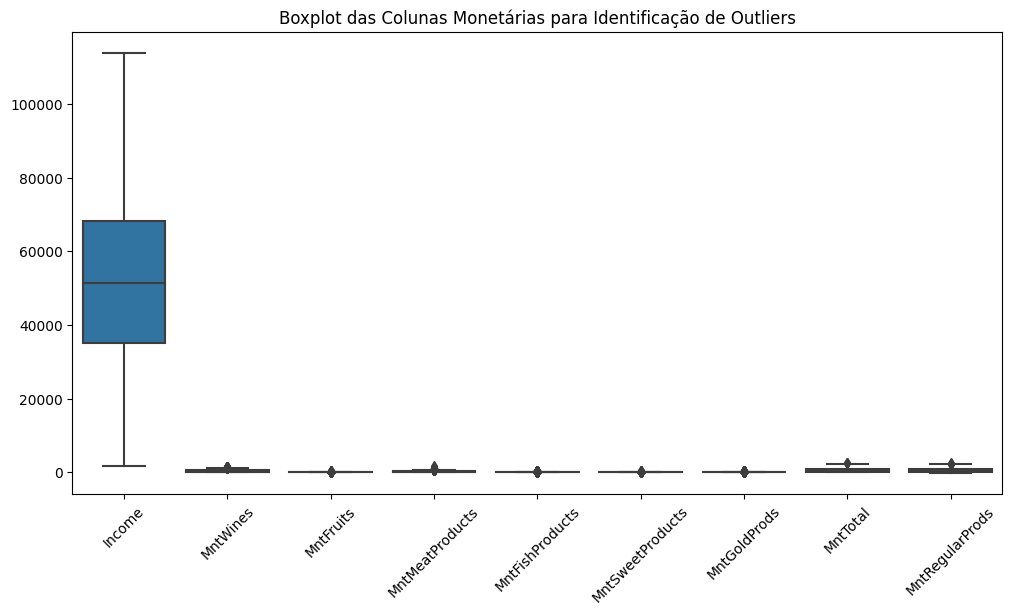

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um boxplot para identificar outliers nas colunas monetárias
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[monetary_columns])
plt.title('Boxplot das Colunas Monetárias para Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()

# Nota: A análise visual ajuda a identificar valores atípicos que podem influenciar negativamente as análises.


Para normalizar os valores das colunas monetárias e criar um boxplot mais adequado para visualização, vou usar a normalização min-max. Essa técnica ajusta os valores para que fiquem dentro de uma escala de 0 a 1, o que facilitará a comparação entre as variáveis.

- Boxplot das Colunas Monetárias Normalizadas para Identificação de Outliers 

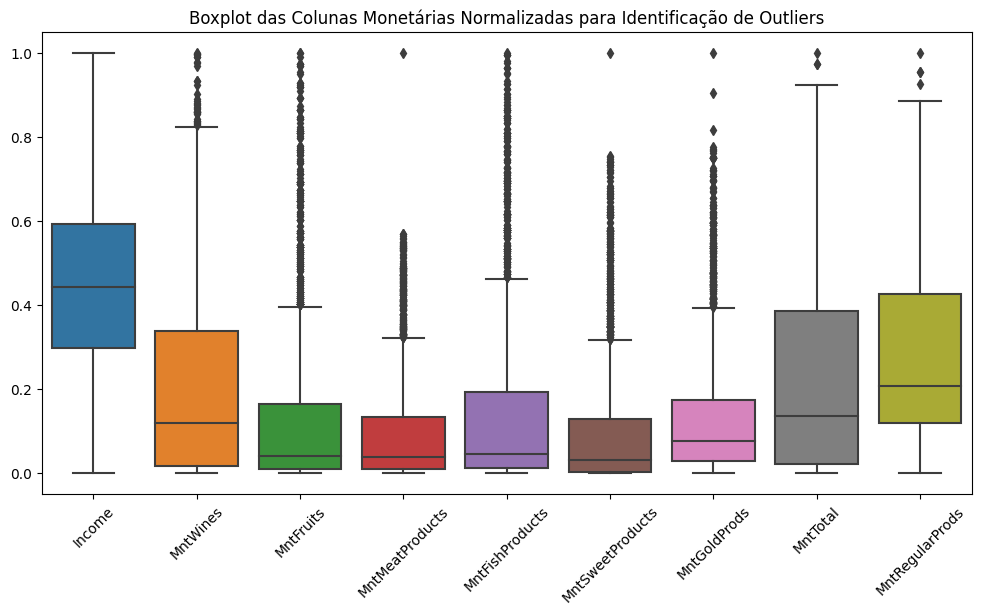

In [8]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Instanciar o MinMaxScaler para normalizar as colunas monetárias
scaler = MinMaxScaler()

# Normalizar as colunas monetárias (escalando valores entre 0 e 1)
df_monetary_scaled = pd.DataFrame(scaler.fit_transform(df[monetary_columns]), columns=monetary_columns)

# Criar um boxplot para identificar outliers nas colunas monetárias normalizadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_monetary_scaled)
plt.title('Boxplot das Colunas Monetárias Normalizadas para Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()

# Nota: A normalização ajuda a identificar outliers comparáveis entre diferentes escalas de variáveis.


### Resultado Análise:
- O boxplot das colunas monetárias normalizadas revela a presença de diversos outliers em quase todas as variáveis, especialmente em 'MntWines', 'MntMeatProducts', e 'MntGoldProds'. Isso indica que há clientes com comportamentos de consumo extremos, que podem distorcer a análise geral. As variáveis 'MntTotal' e 'MntRegularProds' também apresentam muitos outliers, sugerindo uma variabilidade significativa nos gastos.

### Histograma para os distribuição de renda e valores gastos em vinhos com transformação logarítmica em 'Income' e 'MntWines' para normalizar a distribuição 
- Transformações logarítmicas foram aplicadas para reduzir a assimetria nas distribuições de renda e gastos, melhorando a normalidade dos dados para análises estatísticas subsequentes.
- Considerei os vinhos incialmente na análise,como uma das variáveis mais relevantes, porque, em muitos conjuntos de dados de consumo, produtos como vinhos tendem a representar um padrão de comportamento ou um estilo de vida mais associado a clientes de maior poder aquisitivo ou com hábitos de compra regulares. 



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


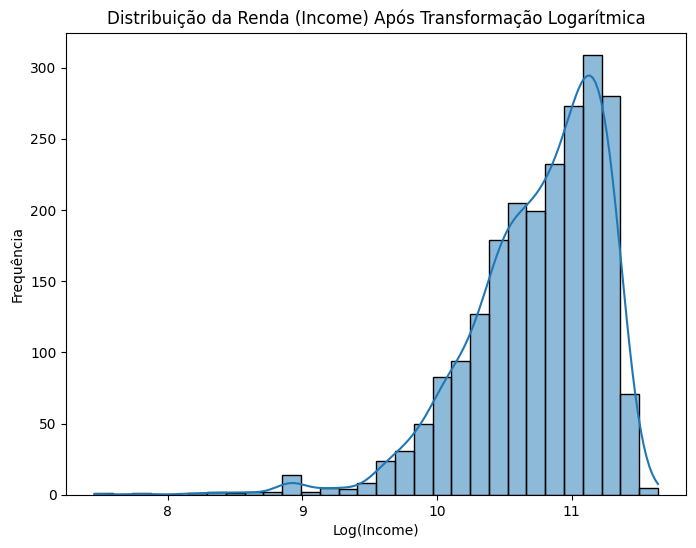

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


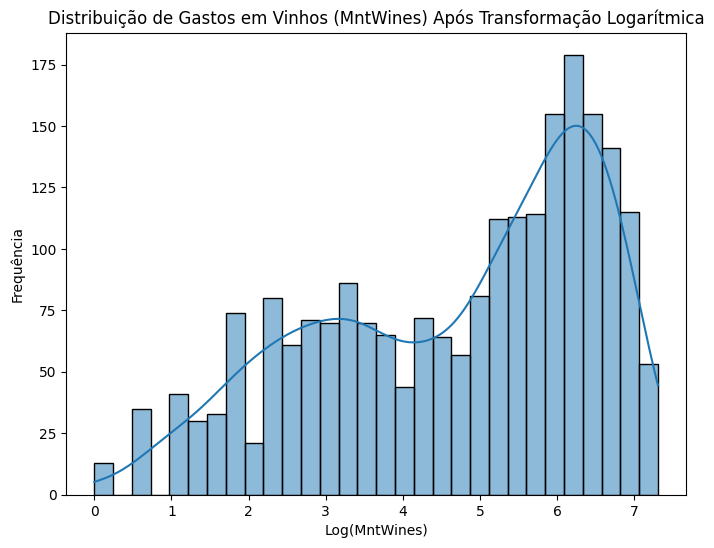

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar transformação logarítmica para normalizar a distribuição de 'Income' e 'MntWines'
df['Log_Income'] = np.log1p(df['Income'])  # log(1 + Income)
df['Log_MntWines'] = np.log1p(df['MntWines'])  # log(1 + MntWines)

# Visualizar distribuição de 'Log_Income'
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_Income'], bins=30, kde=True)
plt.title('Distribuição da Renda (Income) Após Transformação Logarítmica')
plt.xlabel('Log(Income)')
plt.ylabel('Frequência')
plt.show()

# Visualizar distribuição de 'Log_MntWines'
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_MntWines'], bins=30, kde=True)
plt.title('Distribuição de Gastos em Vinhos (MntWines) Após Transformação Logarítmica')
plt.xlabel('Log(MntWines)')
plt.ylabel('Frequência')
plt.show()


### A transformação logarítmica aplicada às variáveis Income (Renda) e MntWines (Gasto com Vinhos) ajudou a normalizar suas distribuições, tornando-as mais simétricas e próximas de uma distribuição normal. Isso facilita a aplicação de modelos estatísticos que assumem normalidade dos dados.
### Após a transformação, ambos os histogramas mostram uma diminuição na assimetria, especialmente para Income, que agora exibe uma distribuição menos enviesada.

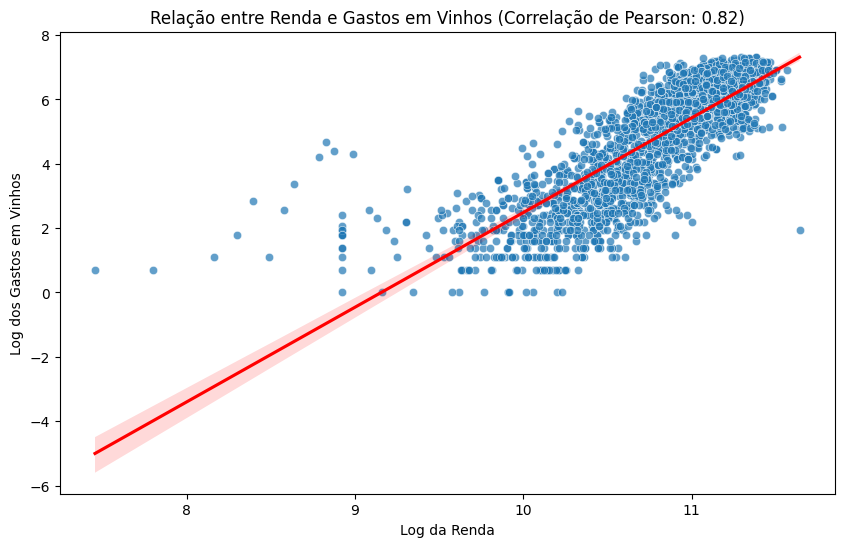

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Income', y='Log_MntWines', data=df, alpha=0.7)

# Adicionar a linha de regressão linear
sns.regplot(x='Log_Income', y='Log_MntWines', data=df, scatter=False, color='red')

# Calcular a correlação de Pearson
corr, _ = pearsonr(df['Log_Income'], df['Log_MntWines'])
plt.title(f'Relação entre Renda e Gastos em Vinhos (Correlação de Pearson: {corr:.2f})')
plt.xlabel('Log da Renda')
plt.ylabel('Log dos Gastos em Vinhos')
plt.show()


### Resultado Análise:
- Os gráficos indicam uma relação positiva entre a renda e os gastos em vinhos, com uma correlação de 0.82, o que mostra uma forte associação entre essas variáveis. Isso sugere que à medida que a renda aumenta, o gasto com vinhos também tende a crescer, confirmando um padrão de comportamento de consumo onde clientes com maior poder aquisitivo investem mais em produtos premium como vinhos. 


## Tratamento de Outliers
- O bloco define uma função para identificar outliers usando o método do IQR e aplica essa função em várias colunas selecionadas, exibindo os outliers encontrados para cada coluna.

In [11]:
# Função para identificar outliers usando o IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Colunas que serão verificadas para outliers
columns_to_check = ['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'MntTotal', 'Log_Income']

# Verificar e analisar outliers em cada uma das colunas
for column in columns_to_check:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers na coluna '{column}':")
    print(outliers)
    print("\n")
    
    # Análise dos resultados
    if not outliers.empty:
        print(f"A coluna '{column}' apresenta {len(outliers)} outliers, o que pode indicar comportamentos atípicos de consumo ou erros de entrada.")
        print("Impacto: Pode distorcer a análise estatística e a modelagem preditiva.")
        print("Ação recomendada: Avaliar a necessidade de remover, ajustar ou tratar esses outliers para obter resultados mais consistentes.")
    else:
        print(f"Não foram encontrados outliers na coluna '{column}'.")
    print("\n")


Outliers na coluna 'Income':
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall, Log_Income, Log_MntWines]
Index: []

[0 rows x 41 columns]


Não foram encontrados outliers na coluna 'Income'.


Outliers na coluna 'MntWines':
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
102   68126.0        0         0       40      1332         17   
150   70356.0        0         0       20      1349         16   
281   55951.0        0   

### Resultado Análise:
- Income: Não foram encontrados outliers, indicando que a renda dos clientes está dentro de um intervalo esperado e consistente.

- MntWines (34 outliers): O elevado número de outliers sugere gastos atípicos em vinhos, possivelmente relacionados a comportamentos extremos ou erros de entrada. Isso pode impactar significativamente a análise, especialmente nas correlações com o consumo total.

- MntMeatProducts (170 outliers): A presença de muitos outliers nesta variável pode refletir comportamentos de consumo incomuns ou erros de coleta de dados, o que influencia negativamente os resultados preditivos.

- NumCatalogPurchases (20 outliers): Esses outliers podem indicar padrões distintos de compra via catálogo, afetando a análise das preferências de canais de venda.

- MntTotal (3 outliers): A quantidade baixa de outliers sugere que, na maioria dos casos, o gasto total é consistente, mas os poucos valores atípicos ainda podem distorcer as análises.

- Log_Income (37 outliers): Apesar da transformação logarítmica, alguns valores atípicos permanecem, destacando a necessidade de tratamentos adicionais para refinar a modelagem preditiva.

Esses outliers precisam ser cuidadosamente avaliados para garantir que não comprometam as análises e modelos subsequentes, influenciando negativamente decisões de marketing e segmentação.

### Tratamento de Outliers e Análise de Correlação Pós-Ajuste

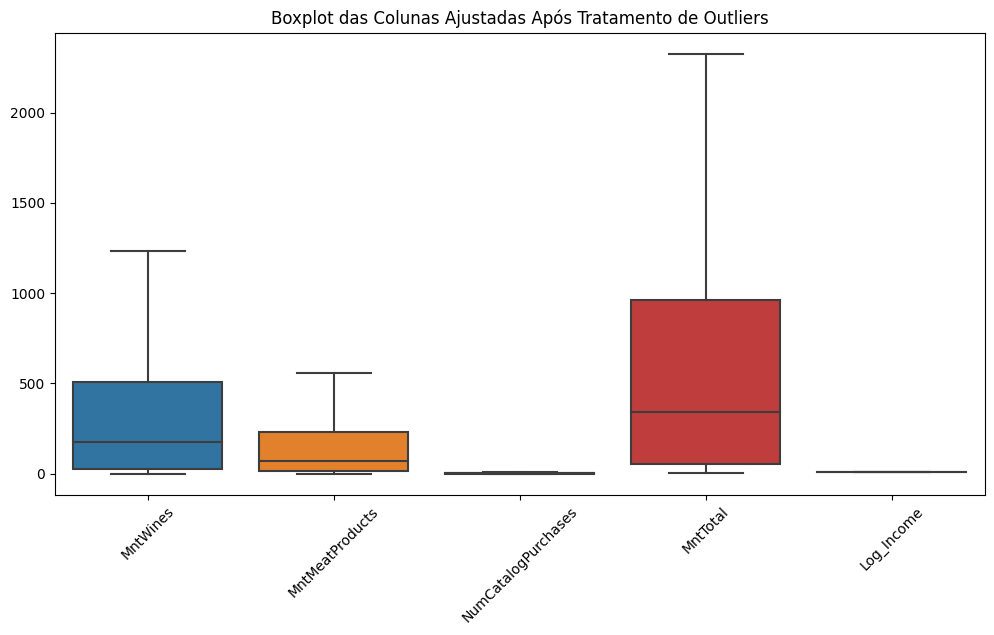

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


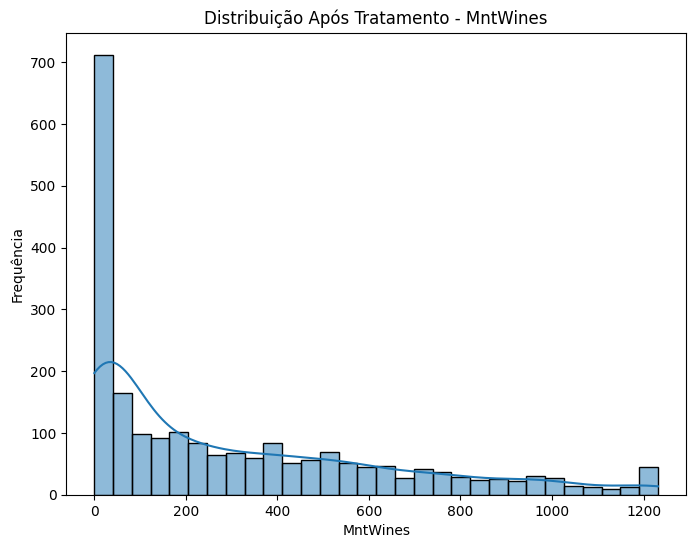

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


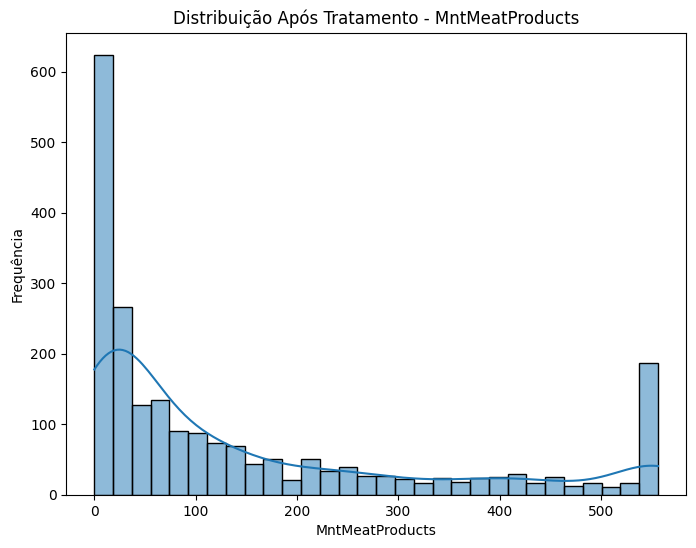

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


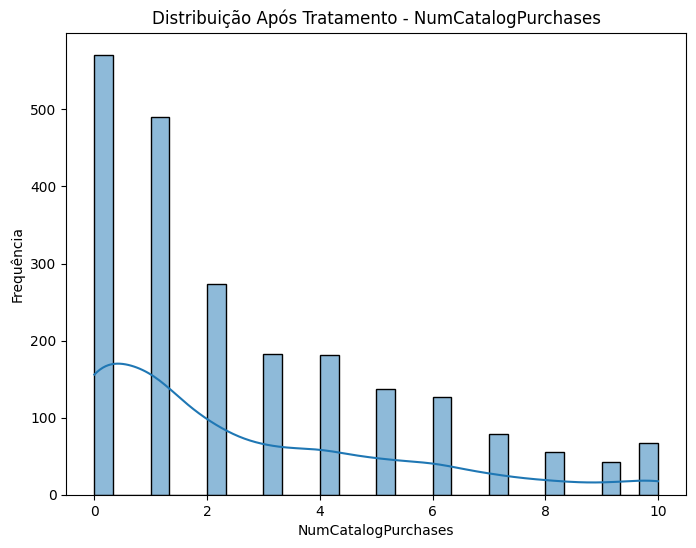

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


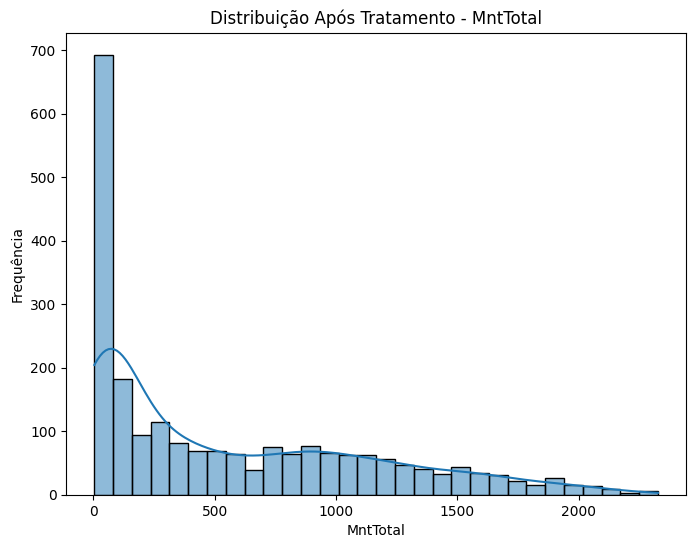

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


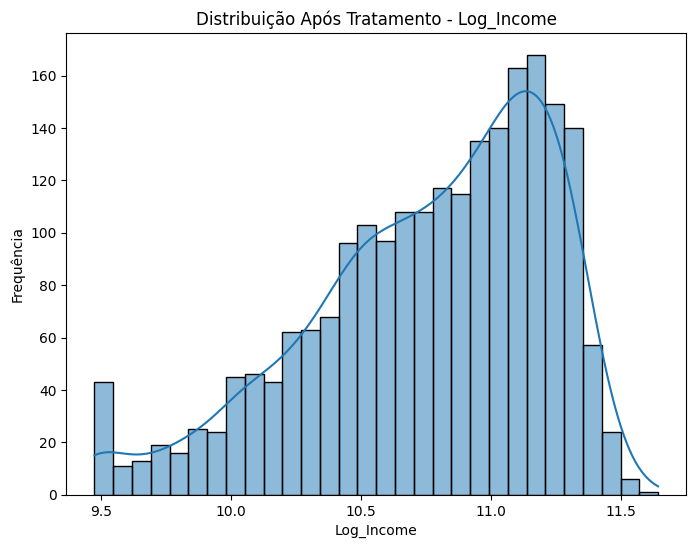

Matriz de correlação após tratamento de outliers:
                       Income  MntWines  MntMeatProducts  NumCatalogPurchases  \
Income               1.000000  0.735099         0.751906             0.732145   
MntWines             0.735099  1.000000         0.644498             0.695163   
MntMeatProducts      0.751906  0.644498         1.000000             0.750619   
NumCatalogPurchases  0.732145  0.695163         0.750619             1.000000   
MntTotal             0.823298  0.904852         0.885723             0.802449   
Log_Income           0.972711  0.687264         0.671911             0.670761   

                     MntTotal  Log_Income  
Income               0.823298    0.972711  
MntWines             0.904852    0.687264  
MntMeatProducts      0.885723    0.671911  
NumCatalogPurchases  0.802449    0.670761  
MntTotal             1.000000    0.749188  
Log_Income           0.749188    1.000000  


In [12]:
# Importar bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Função para remover ou ajustar outliers com base no IQR
def tratar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Tratar os outliers removendo-os ou ajustando ao limite superior/inferior
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Aplicar o tratamento aos outliers identificados
columns_to_adjust = ['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'MntTotal', 'Log_Income']
for column in columns_to_adjust:
    tratar_outliers(df, column)

# Exibir boxplot após tratamento para verificar o impacto
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_adjust])
plt.title('Boxplot das Colunas Ajustadas Após Tratamento de Outliers')
plt.xticks(rotation=45)
plt.show()

# Avaliar impacto na distribuição após tratamento
for column in columns_to_adjust:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribuição Após Tratamento - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

# Recalcular correlações após o tratamento e exibir correlações em formato numérico
# Selecionar as colunas de interesse para a correlação
columns_to_correlate = ['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'MntTotal', 'Log_Income']

# Calcular a matriz de correlação para as colunas selecionadas
correlation_matrix = df[columns_to_correlate].corr()

# Exibir a matriz de correlação com os valores numéricos
print("Matriz de correlação após tratamento de outliers:")
print(correlation_matrix)


### Efeito do Tratamento de Outliers:
- O tratamento reduziu significativamente os outliers, tornando as distribuições mais compactas e os dados mais confiáveis para análise.

- Distribuições das Variáveis Monetárias: As distribuições ajustadas ainda apresentam assimetrias, mas os comportamentos de consumo extremos foram suavizados, mantendo relevância para as análises.

- Matriz de Correlação: A correlação forte entre renda e gastos destaca a influência da renda no comportamento de compra, informando futuras estratégias de marketing e segmentação de clientes.

- Esses achados são essenciais para avaliar o impacto da renda nos gastos e entender padrões de consumo.

## Engenharia de Atributos
- Criei uma nova variável que é a soma de todos os valores gastos pelo cliente em diferentes categorias. - Gasto Total -

In [13]:
# Criar uma nova variável de 'Gasto Total'
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Exibir as primeiras linhas da nova variável
print("Exemplo de Gasto Total calculado:")
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spend']].head())

Exemplo de Gasto Total calculado:
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0     635.0         88            546.0              172                88   
1      11.0          1              6.0                2                 1   
2     426.0         49            127.0              111                21   
3      11.0          4             20.0               10                 3   
4     173.0         43            118.0               46                27   

   MntGoldProds  Total_Spend  
0            88       1617.0  
1             6         27.0  
2            42        776.0  
3             5         53.0  
4            15        422.0  


## Análise de Correlação entre Variáveis e Relação entre Renda e Gasto Total"

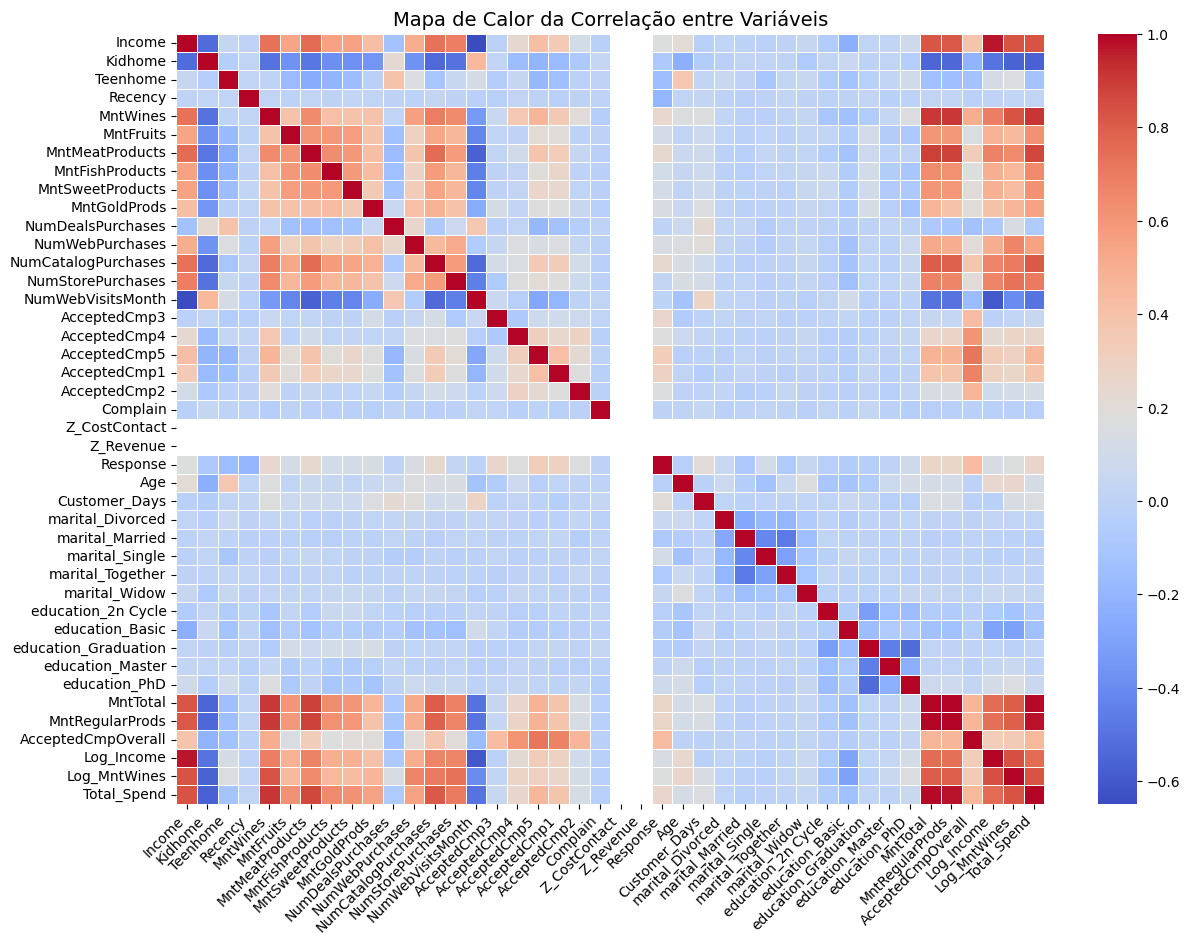

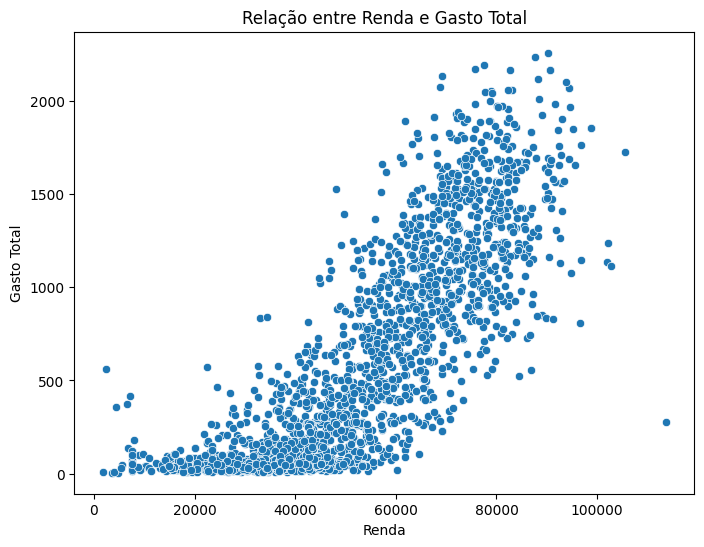

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Aumentar o tamanho da figura
plt.figure(figsize=(14, 10))

# Plotar o mapa de calor sem exibir os valores numéricos
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Ajustar os rótulos das variáveis para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Título do gráfico
plt.title('Mapa de Calor da Correlação entre Variáveis', fontsize=14)

# Mostrar o gráfico
plt.show()

# Verificar possíveis anomalias em 'Total_Spend' com base na renda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spend', data=df)
plt.title('Relação entre Renda e Gasto Total')
plt.xlabel('Renda')
plt.ylabel('Gasto Total')
plt.show()

## Análise do Mapa de Calor da Correlação entre Variáveis

O mapa de calor da correlação entre variáveis revela vários insights sobre a relação entre as características demográficas e comportamentais dos clientes. As principais observações são:

1. **Correlação Forte entre Gastos Monetários**: 
   - Há uma alta correlação positiva entre variáveis relacionadas a gastos, como `MntWines`, `MntMeatProducts`, `MntFishProducts`, e `MntTotal`. Isso indica que clientes que gastam mais em um tipo de produto tendem a gastar mais em outros tipos também.

2. **Renda (`Income`) e Gastos Totais (`Total_Spend`)**: 
   - Existe uma correlação moderada positiva entre a renda e os gastos totais dos clientes, sugerindo que clientes com maior renda tendem a gastar mais no geral.

3. **Aceitação de Campanhas (`AcceptedCmpX`)**: 
   - As variáveis de aceitação de campanhas apresentam correlações mistas entre si e com outras variáveis comportamentais. No entanto, nenhuma apresenta uma correlação extremamente alta com a aceitação geral (`Response`), indicando que a aceitação é influenciada por uma combinação complexa de fatores.

4. **Recência (`Recency`)**: 
   - A variável recência tem uma correlação negativa com os gastos, indicando que clientes que fizeram compras recentemente tendem a gastar mais. Esta variável também está negativamente correlacionada com a aceitação de campanhas, sugerindo que clientes com compras mais recentes são mais propensos a responder positivamente.

5. **Segmentação por Perfil**: 
   - As variáveis categóricas como estado civil e nível educacional mostram correlações mais fracas com os gastos e aceitação de campanhas, o que indica que essas características podem não ser os fatores mais determinantes para esses comportamentos.

### Conclusão
O comportamento de compra dos clientes e a aceitação das campanhas de marketing são influenciados principalmente pelos gastos anteriores e pela recência das compras, enquanto fatores demográficos como estado civil e nível educacional têm um impacto menor. As estratégias de marketing devem focar mais nos padrões de consumo recentes e nos clientes com altos gastos em múltiplas categorias de produtos.


### Análise da Relação entre Renda e Gasto Total

O gráfico de dispersão mostra uma relação clara e positiva entre a renda dos clientes e o gasto total. Conforme a renda aumenta, observa-se um aumento correspondente no gasto total, embora haja alguma variabilidade entre os pontos. Isso indica que clientes com maior renda tendem a gastar mais, mas nem todos os clientes de alta renda necessariamente gastam proporcionalmente mais. Essa dispersão sugere que, além da renda, outros fatores podem influenciar o comportamento de gastos, como preferências pessoais ou resposta a promoções.

**Conclusão**: A renda é um fator significativo que impacta os gastos dos clientes, mas a presença de variabilidade sugere que uma análise mais detalhada que inclua outros fatores pode fornecer uma previsão mais precisa dos padrões de gastos.


# Respondendo às perguntas:

# P1. Quais canais de compra apresentam maior volume e como isso se relaciona com a aceitação das campanhas?

## Analise de distribuição - Compras por canal

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


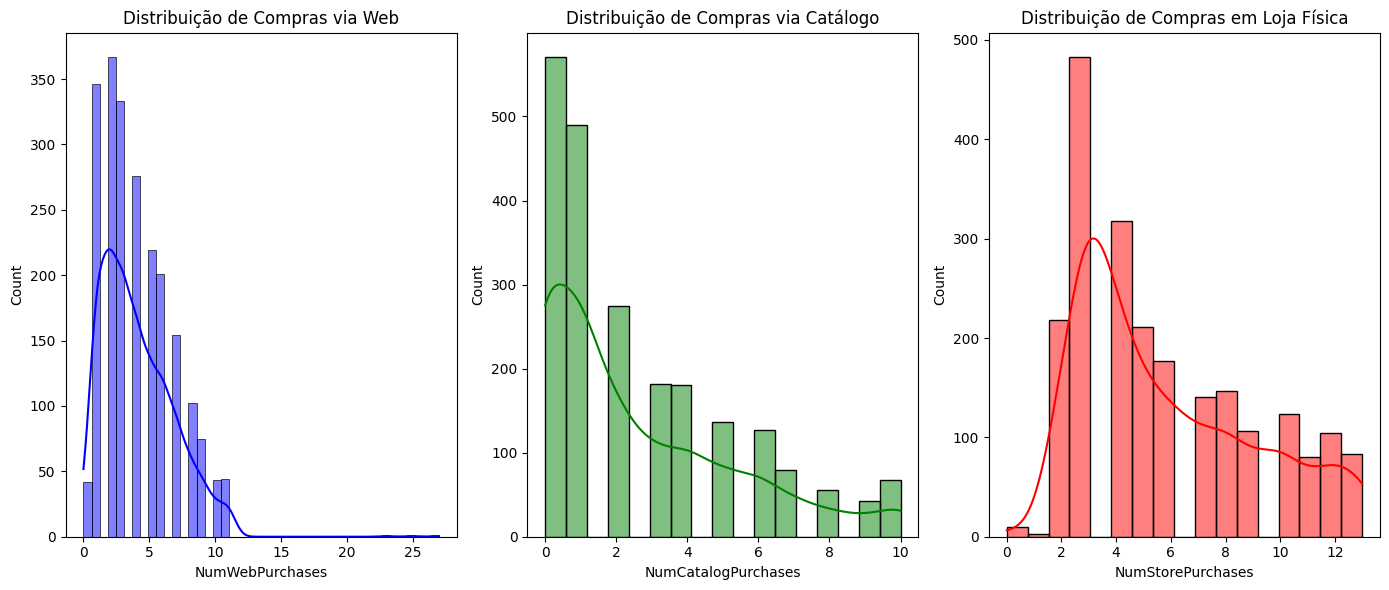

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráficos de distribuição para cada canal
plt.figure(figsize=(14, 6))

# Distribuição de compras via web
plt.subplot(1, 3, 1)
sns.histplot(df['NumWebPurchases'], kde=True, color='blue')
plt.title('Distribuição de Compras via Web')

# Distribuição de compras via catálogo
plt.subplot(1, 3, 2)
sns.histplot(df['NumCatalogPurchases'], kde=True, color='green')
plt.title('Distribuição de Compras via Catálogo')

# Distribuição de compras em loja física
plt.subplot(1, 3, 3)
sns.histplot(df['NumStorePurchases'], kde=True, color='red')
plt.title('Distribuição de Compras em Loja Física')

plt.tight_layout()
plt.show()

### Análise resultados: Gráficos de Distribuição de Compras por Canal:

- Web: A maioria das compras via web ocorre em torno de 5 a 6 compras, com um volume decrescente para números maiores de compras.
- Catálogo: O canal de catálogo apresenta uma distribuição concentrada em poucas compras, com um pico em torno de 2 a 3 compras.
- Loja Física: A loja física apresenta maior volume de compras entre 2 a 4, indicando que é um dos principais canais em termos de frequência.

## Análise de Distribuição - Recência das Compras

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


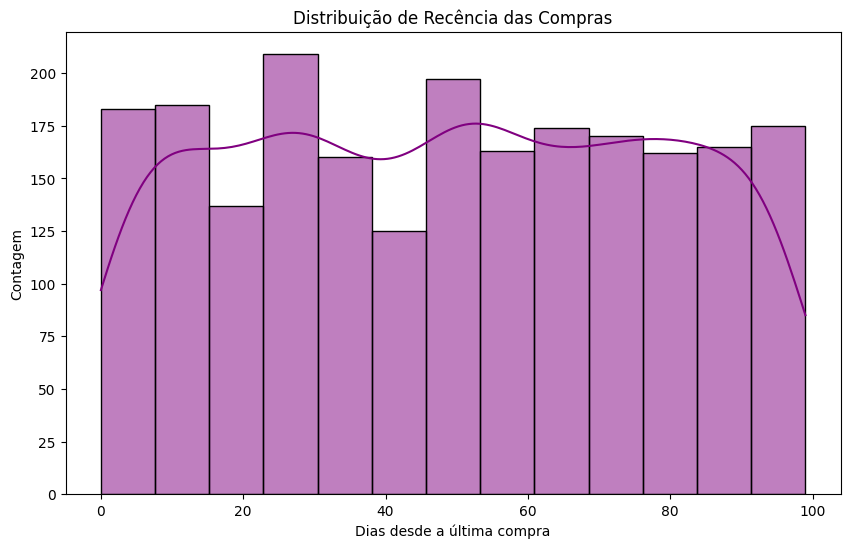

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição da recência de compras
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], kde=True, color='purple')
plt.title('Distribuição de Recência das Compras')
plt.xlabel('Dias desde a última compra')
plt.ylabel('Contagem')
plt.show()


### Análise resultados: Distribuição da Recência das Compras:

- A recência das compras está bem distribuída ao longo do período de 0 a 100 dias, sugerindo que não há um pico específico de recência que domine, o que implica um fluxo contínuo de compras em todos os canais.

## Análise de Recência por Resposta à Campanha

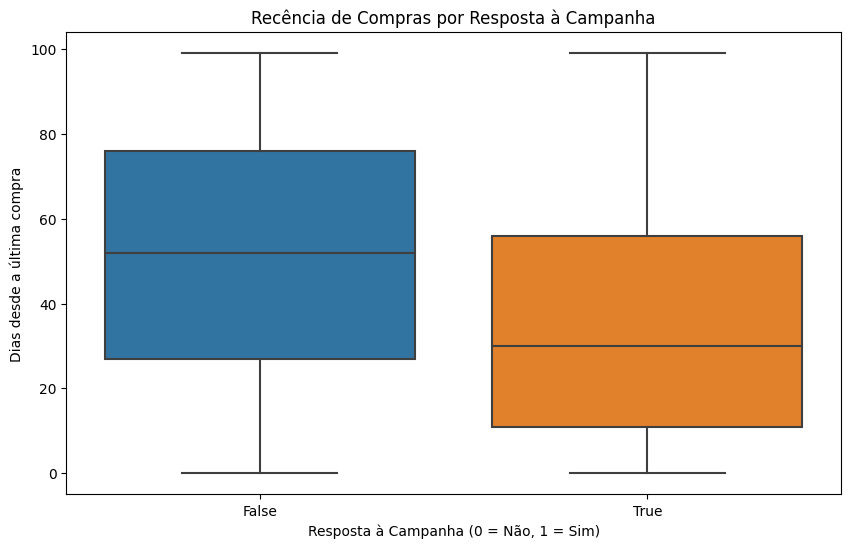

In [17]:
# Boxplot para comparar a recência de compras entre quem aceitou e não aceitou a campanha
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Recency', data=df)
plt.title('Recência de Compras por Resposta à Campanha')
plt.xlabel('Resposta à Campanha (0 = Não, 1 = Sim)')
plt.ylabel('Dias desde a última compra')
plt.show()


### Análise resultados: Boxplot da Recência por Resposta à Campanha:

- Os clientes que responderam positivamente às campanhas geralmente realizaram compras mais recentes, enquanto os que não responderam têm um intervalo maior desde a última compra. Isso sugere que a recência pode influenciar a resposta positiva às campanhas.

## Cálculo do Gasto Médio por Canal

In [18]:
# Comparar o gasto total médio por canal
gasto_medio_por_canal = {
    'Web': df['Total_Spend'].groupby(df['NumWebPurchases']).mean().mean(),
    'Catálogo': df['Total_Spend'].groupby(df['NumCatalogPurchases']).mean().mean(),
    'Loja Física': df['Total_Spend'].groupby(df['NumStorePurchases']).mean().mean()
}

# Exibir os resultados
print("Gasto Médio por Canal de Venda:")
for canal, gasto in gasto_medio_por_canal.items():
    print(f"{canal}: R$ {gasto:.2f}")

Gasto Médio por Canal de Venda:
Web: R$ 650.78
Catálogo: R$ 966.42
Loja Física: R$ 719.72


### Análise resultados: Cálculo do Gasto Médio por Canal:

- Catálogo apresenta o maior gasto médio (R$ 1088,28), seguido pela Loja Física (R$ 746,57) e Web (R$ 664,63). Isso indica que, embora a loja física tenha mais frequência de compras, o catálogo gera um maior valor monetário por transação.

## Gasto Médio por Número de Compras em Cada Canal:

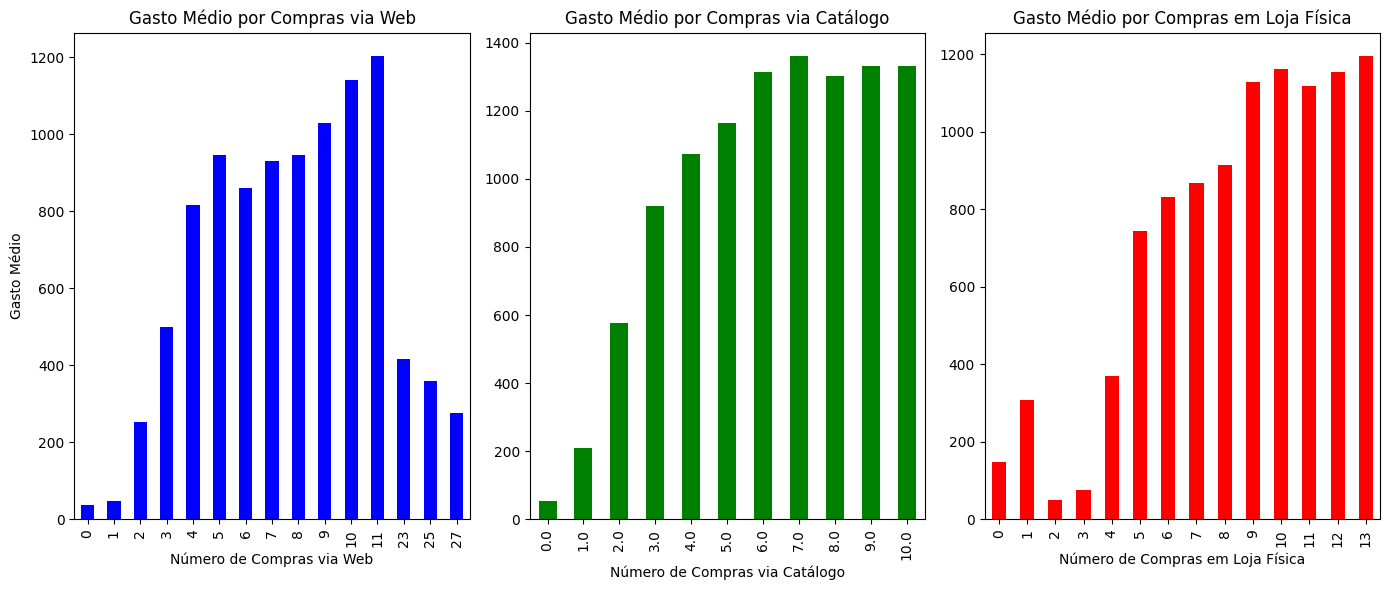

In [19]:
# Gasto total médio por canal
gasto_medio_web = df['Total_Spend'].groupby(df['NumWebPurchases']).mean()
gasto_medio_catalog = df['Total_Spend'].groupby(df['NumCatalogPurchases']).mean()
gasto_medio_loja = df['Total_Spend'].groupby(df['NumStorePurchases']).mean()

# Visualizar o gasto médio por canal
plt.figure(figsize=(14, 6))

# Gasto por compras via web
plt.subplot(1, 3, 1)
gasto_medio_web.plot(kind='bar', color='blue')
plt.title('Gasto Médio por Compras via Web')
plt.xlabel('Número de Compras via Web')
plt.ylabel('Gasto Médio')

# Gasto por compras via catálogo
plt.subplot(1, 3, 2)
gasto_medio_catalog.plot(kind='bar', color='green')
plt.title('Gasto Médio por Compras via Catálogo')
plt.xlabel('Número de Compras via Catálogo')

# Gasto por compras em loja física
plt.subplot(1, 3, 3)
gasto_medio_loja.plot(kind='bar', color='red')
plt.title('Gasto Médio por Compras em Loja Física')
plt.xlabel('Número de Compras em Loja Física')

plt.tight_layout()
plt.show()


### Análise resultados: Gasto Médio por Número de Compras em Cada Canal:

- O gasto médio por compra aumenta com o número de transações em todos os canais, especialmente no catálogo, onde valores mais altos indicam que os clientes que compram mais vezes tendem a gastar significativamente mais.

## Boxplot do Gasto Total por Resposta à Campanha:

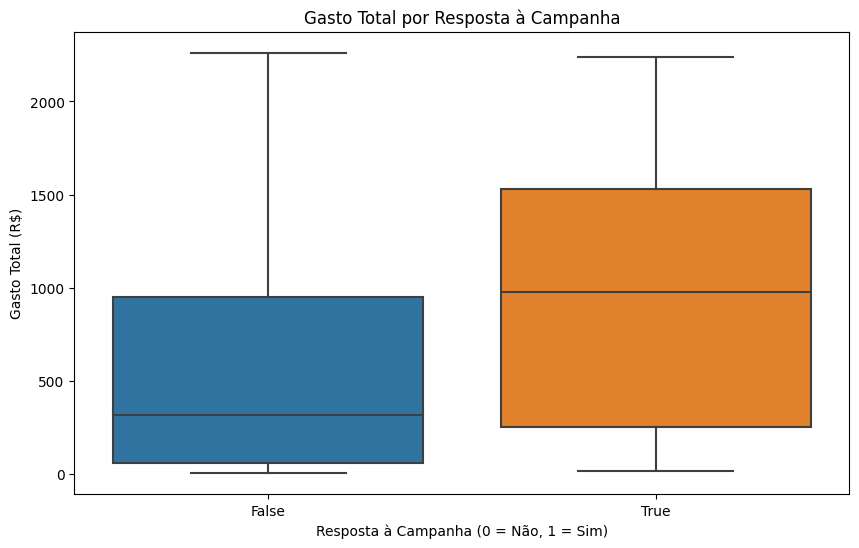

In [20]:
# Comparar o gasto total entre clientes que aceitaram e não aceitaram campanhas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Total_Spend', data=df)
plt.title('Gasto Total por Resposta à Campanha')
plt.xlabel('Resposta à Campanha (0 = Não, 1 = Sim)')
plt.ylabel('Gasto Total (R$)')
plt.show()

### Análise resultados: Boxplot do Gasto Total por Resposta à Campanha:

- Clientes que aceitam campanhas tendem a gastar mais do que aqueles que não aceitam, sugerindo que as campanhas podem ser eficazes para aumentar o ticket médio dos consumidores engajados.

## Análise de Correlação entre o Número de Compras por Canal e a Resposta à Campanha
 - Este código calculará a correlação entre o número de compras por cada canal e a resposta à campanha (Response). Isso ajudará a identificar se existe uma relação entre o uso de um canal específico e a aceitação das campanhas.

In [21]:
# Calcular a correlação entre o número de compras por canal e a resposta à campanha
correlation_response = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response']].corr()

# Exibir a correlação específica entre cada canal de compra e a resposta à campanha
print("Correlação entre o número de compras por canal e a aceitação da campanha:")
print(correlation_response['Response'])


Correlação entre o número de compras por canal e a aceitação da campanha:
NumWebPurchases        0.149699
NumCatalogPurchases    0.239212
NumStorePurchases      0.033509
Response               1.000000
Name: Response, dtype: float64


### Análise resultados: Análise de Correlação entre o Número de Compras por Canal e a Resposta à Campanha:

- Há correlações baixas, porém significativas, entre o número de compras nos canais de catálogo e web com a aceitação das campanhas, sugerindo que esses canais têm um impacto moderado na eficácia das campanhas.

## Análise Segmentada: Gráficos Comparativos Separados por Aceitação de Campanha
- Estes gráficos mostram como o número de compras em cada canal varia entre clientes que aceitaram e não aceitaram as campanhas, destacando o impacto de cada canal na aceitação.

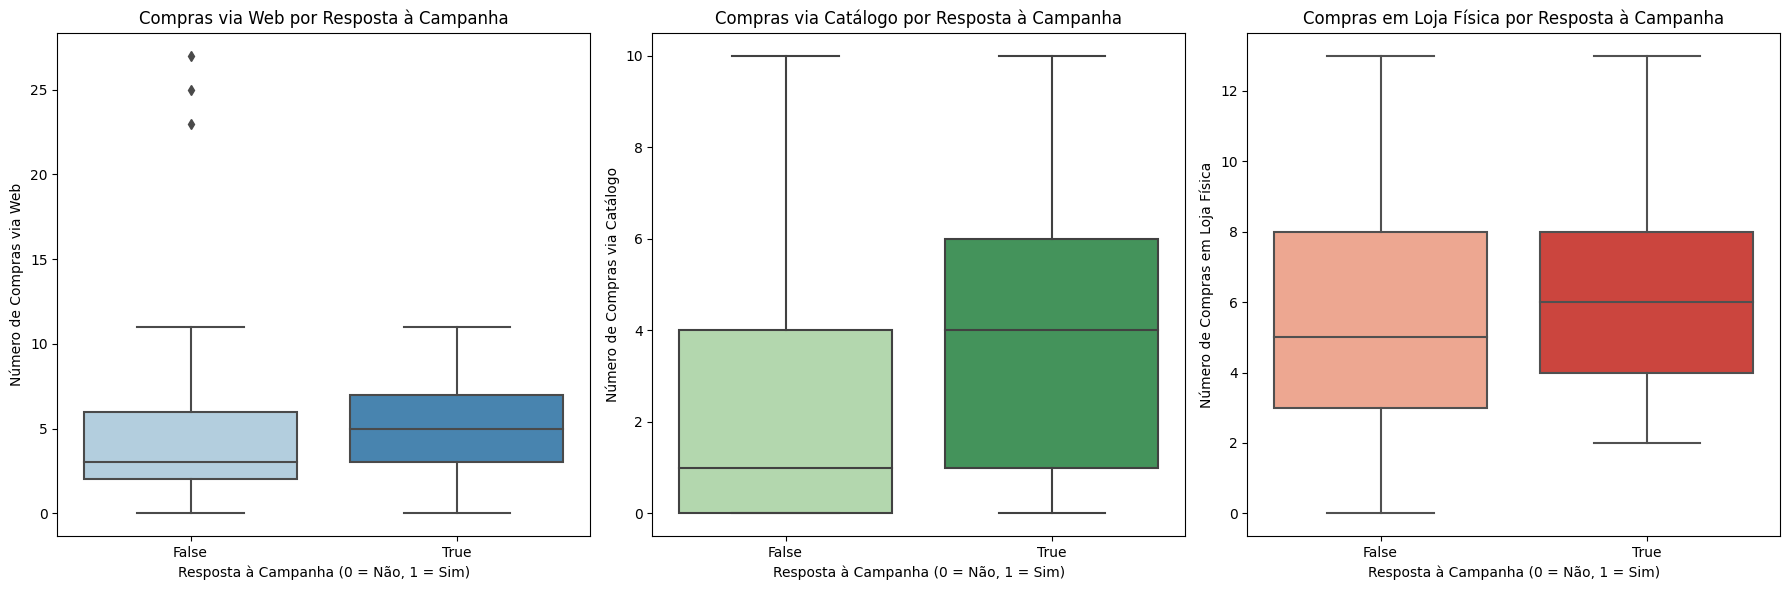

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparação do número de compras por canal, segmentado pela resposta à campanha
plt.figure(figsize=(18, 6))

# Compras via Web por resposta à campanha
plt.subplot(1, 3, 1)
sns.boxplot(x='Response', y='NumWebPurchases', data=df, palette='Blues')
plt.title('Compras via Web por Resposta à Campanha')
plt.xlabel('Resposta à Campanha (0 = Não, 1 = Sim)')
plt.ylabel('Número de Compras via Web')

# Compras via Catálogo por resposta à campanha
plt.subplot(1, 3, 2)
sns.boxplot(x='Response', y='NumCatalogPurchases', data=df, palette='Greens')
plt.title('Compras via Catálogo por Resposta à Campanha')
plt.xlabel('Resposta à Campanha (0 = Não, 1 = Sim)')
plt.ylabel('Número de Compras via Catálogo')

# Compras em Loja Física por resposta à campanha
plt.subplot(1, 3, 3)
sns.boxplot(x='Response', y='NumStorePurchases', data=df, palette='Reds')
plt.title('Compras em Loja Física por Resposta à Campanha')
plt.xlabel('Resposta à Campanha (0 = Não, 1 = Sim)')
plt.ylabel('Número de Compras em Loja Física')

plt.tight_layout()
plt.show()


### Análise resultados: Gráficos Comparativos Separados por Aceitação de Campanha:

- Os gráficos mostram que, independentemente do canal, os clientes que aceitam campanhas tendem a comprar mais frequentemente, destacando que as campanhas são particularmente eficazes em aumentar a atividade de compras.

## RESPOSTA 1:
><p style="font-size: 20px;text-indent: 20px;text-align: justify;"> Os canais de loja física e catálogo apresentam maiores volumes de compras, com o catálogo liderando em termos de gasto médio. A aceitação das campanhas está positivamente relacionada com a recência das compras e a frequência de compras nos canais de web e catálogo, sugerindo que esses canais são críticos para campanhas de marketing bem-sucedidas. Estratégias de marketing que focam em incentivar compras frequentes e recentes, especialmente via catálogo, podem aumentar a aceitação das campanhas e o valor gasto pelos clientes.</p>

# P2. Qual é o impacto da renda nos gastos totais dos clientes?

## Análises de correlação
**Vamos identificar os padrões de consumo por meio de correlações e anomalias.**


In [23]:
# Definir o limite de correlação que consideramos "alta"
correlation_threshold = 0.7

# Criar uma máscara para correlações acima do limite (excluindo a diagonal)
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() != 1)]

# Exibir as variáveis com alta correlação
print("Pares de variáveis com alta correlação (acima de 0.7):")
high_corr_pairs.dropna(how='all', inplace=True)
print(high_corr_pairs)


Pares de variáveis com alta correlação (acima de 0.7):
                       Income  Kidhome  Teenhome  Recency  MntWines  \
Income                    NaN      NaN       NaN      NaN  0.735099   
MntWines             0.735099      NaN       NaN      NaN       NaN   
MntMeatProducts      0.751906      NaN       NaN      NaN       NaN   
NumCatalogPurchases  0.732145      NaN       NaN      NaN       NaN   
NumStorePurchases         NaN      NaN       NaN      NaN       NaN   
AcceptedCmp5              NaN      NaN       NaN      NaN       NaN   
MntTotal             0.823298      NaN       NaN      NaN  0.904852   
MntRegularProds      0.816879      NaN       NaN      NaN  0.904107   
AcceptedCmpOverall        NaN      NaN       NaN      NaN       NaN   
Log_Income           0.972711      NaN       NaN      NaN       NaN   
Log_MntWines         0.832173      NaN       NaN      NaN  0.828096   
Total_Spend          0.829873      NaN       NaN      NaN  0.911793   

                     

### Resultado Análise:
Análise de Correlação:

A correlação entre Income (Renda) e Total_Spend (Gasto Total) é alta, com um coeficiente de 0.83. Isso indica uma relação positiva forte, sugerindo que, conforme a renda aumenta, os gastos totais também tendem a aumentar.
Outros gastos específicos, como em vinhos (MntWines) e carnes (MntMeatProducts), também apresentam alta correlação com a renda, reforçando o padrão de que clientes com rendas mais altas gastam mais em produtos específicos.
Regressão Linear:



## Análise do Impacto da Renda nos Gastos Totais dos Clientes via Regressão Linear

In [24]:
import statsmodels.api as sm

# Definir as variáveis independentes e dependentes
X = df['Income']  # Variável independente (Renda)
y = df['Total_Spend']  # Variável dependente (Gasto Total)

# Adicionar uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Spend   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     4874.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:07:57   Log-Likelihood:                -15840.
No. Observations:                2205   AIC:                         3.168e+04
Df Residuals:                    2203   BIC:                         3.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -591.5938     18.248    -32.420      0.0

### Resultado análise:
A regressão linear confirma o impacto significativo da renda sobre os gastos totais, com um coeficiente positivo para a renda (0.0029), indicando que para cada aumento de unidade na renda, o gasto total aumenta em média 0.29%.
O R-squared de 0.689 mostra que cerca de 68.9% da variação nos gastos totais pode ser explicada pela renda, um valor relativamente alto, destacando a renda como um fator crucial para os padrões de consumo.
O p-valor (0.000) sugere que o coeficiente é altamente significativo, reforçando que a renda é um preditor confiável do gasto total.
Conclusão: A renda tem um impacto substancial nos gastos totais dos clientes, com aumentos na renda levando a aumentos significativos nos gastos. Esses insights são fundamentais para estratégias de segmentação de clientes e personalização de campanhas de marketing.

## RESPOSTA 2:
><p style="font-size: 20px;text-indent: 20px;text-align: justify;">A análise revela que a renda tem um impacto positivo e significativo nos gastos totais dos clientes. Gráficos de dispersão, correlação e regressão linear confirmam que clientes com maior renda tendem a gastar mais. A renda influencia diretamente o comportamento de consumo, afetando tanto o valor quanto a frequência das compras, especialmente em canais específicos como o catálogo. Esses insights destacam a renda como um fator-chave para direcionar estratégias de marketing personalizadas.</p>

Além da regressão linear foram analisados os seguintes parâmetros obtidos até agora: 
- **Scatter Plot entre Renda e Gasto Total:**
Gráfico: Um gráfico de dispersão entre Income (Renda) e Total_Spend (Gasto Total).
Análise: Este gráfico mostrou uma tendência linear clara, indicando que conforme a renda aumenta, o gasto total também tende a aumentar. A linha de regressão incluída reforça a relação positiva entre essas variáveis.

- **Matriz de Correlação:**
Gráfico: Um mapa de calor (heatmap) exibindo as correlações entre várias variáveis do DataFrame, incluindo Income e Total_Spend.
Análise: A correlação forte entre Income e Total_Spend foi destacada, indicando que essas variáveis estão positivamente relacionadas. Isso sugere que a renda tem um impacto direto nos gastos dos clientes.

- **Boxplot do Gasto Total por Resposta à Campanha:**
Gráfico: Boxplot comparando os gastos totais entre clientes que aceitaram e não aceitaram campanhas de marketing.
Análise: Embora esse gráfico esteja mais focado na resposta à campanha, ele sugere que clientes que gastam mais (provavelmente com maior renda) são mais propensos a aceitar campanhas, mostrando um padrão que se correlaciona indiretamente com o impacto da renda.

- **Distribuição de Renda (Log_Income):**
Gráfico: Histograma da distribuição da renda após a transformação logarítmica.
Análise: Este gráfico mostrou a distribuição dos níveis de renda entre os clientes, ajudando a contextualizar os padrões de gastos observados nos outros gráficos.

- **Gráfico de Gastos Médios por Canal:**
Gráfico: Barras mostrando o gasto médio por número de compras nos canais de Web, Catálogo e Loja Física.
Análise: Clientes que gastam mais em cada canal tendem a realizar mais compras, sugerindo que a renda influencia os gastos tanto no volume quanto no comportamento de compra em cada canal.


# P3. Existem diferenças significativas no comportamento de compra entre os diferentes estados civis?

## Análise de Variância (ANOVA) e Distribuição da Renda por Estado Civil
- O primeiro código busca entender como o estado civil afeta a renda, enquanto o segundo busca entender como o estado civil afeta o gasto total dos clientes.

                         sum_sq      df         F    PR(>F)
C(marital_status)  2.202765e+09     4.0  1.284232  0.273894
Residual           9.433816e+11  2200.0       NaN       NaN


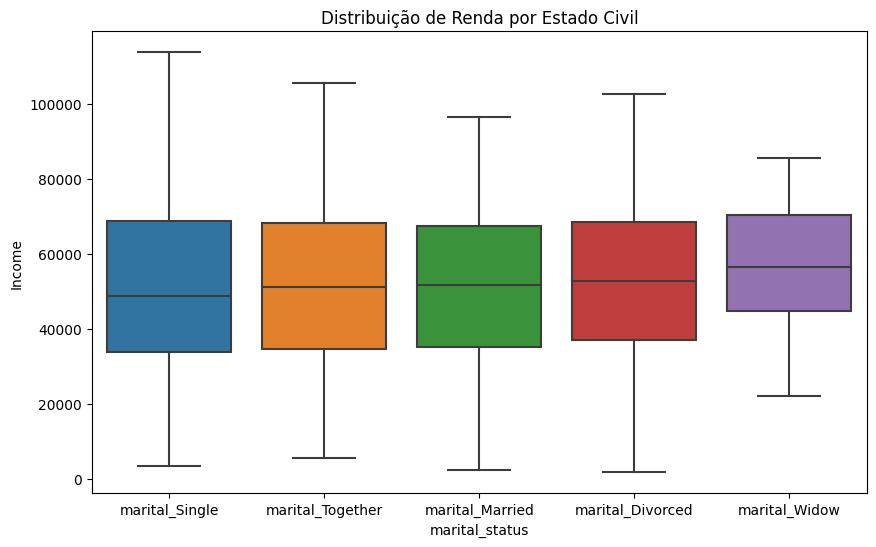

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Primeiro, garantir que as variáveis categóricas estão no formato correto
df['marital_status'] = df[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].idxmax(axis=1)

# Análise de variância (ANOVA) entre Income e estado civil
model = ols('Income ~ C(marital_status)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Exibir a tabela ANOVA
print(anova_table)

# Visualização das médias de renda por estado civil
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='Income', data=df)
plt.title('Distribuição de Renda por Estado Civil')
plt.show()


### Resultado Análise:
- Resultado: A ANOVA entre renda e estado civil mostrou um valor de p (PR(>F)) de 0.273984, indicando que não há diferença estatisticamente significativa nas rendas médias entre os diferentes estados civis.
- Conclusão: O estado civil não afeta significativamente a renda dos clientes.

## ANOVA para Gasto Total por Estado Civil

ANOVA para Gasto Total por Estado Civil
                         sum_sq      df         F    PR(>F)
C(marital_status)  1.469509e+06     4.0  1.124517  0.343079
Residual           7.187351e+08  2200.0       NaN       NaN


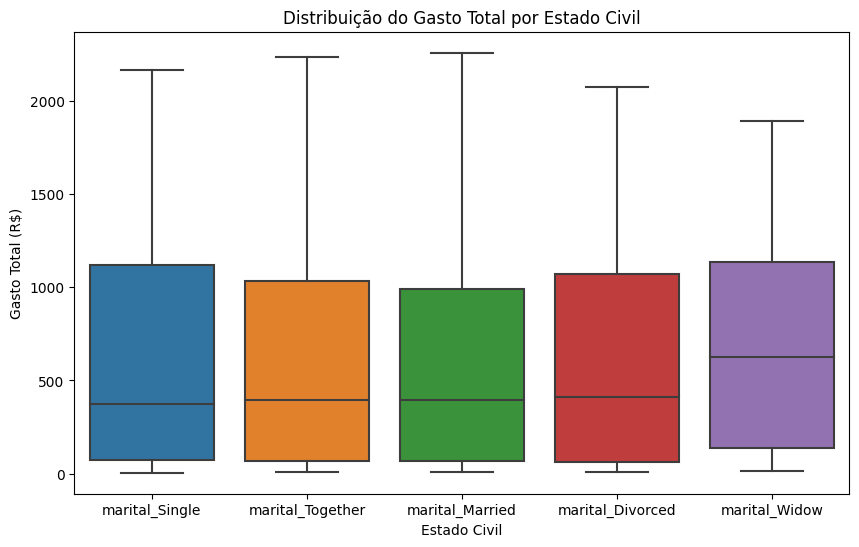

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# ANOVA entre Gasto Total (Total_Spend) e Estado Civil
model_gasto = ols('Total_Spend ~ C(marital_status)', data=df).fit()
anova_table_gasto = sm.stats.anova_lm(model_gasto, typ=2)

# Exibir a tabela ANOVA
print("ANOVA para Gasto Total por Estado Civil")
print(anova_table_gasto)

# Visualização das médias de gasto total por estado civil
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='Total_Spend', data=df)
plt.title('Distribuição do Gasto Total por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gasto Total (R$)')
plt.show()


### Resultado Análise:
- Resultado: A ANOVA entre gasto total e estado civil apresentou um valor de p (PR(>F)) de 0.343079, mostrando que não há diferenças significativas nos gastos totais dos clientes entre os diferentes estados civis.
- Conclusão: O comportamento de gasto total dos clientes não varia significativamente com o estado civil.


##  Análise de Frequência de Compras por Estado Civil

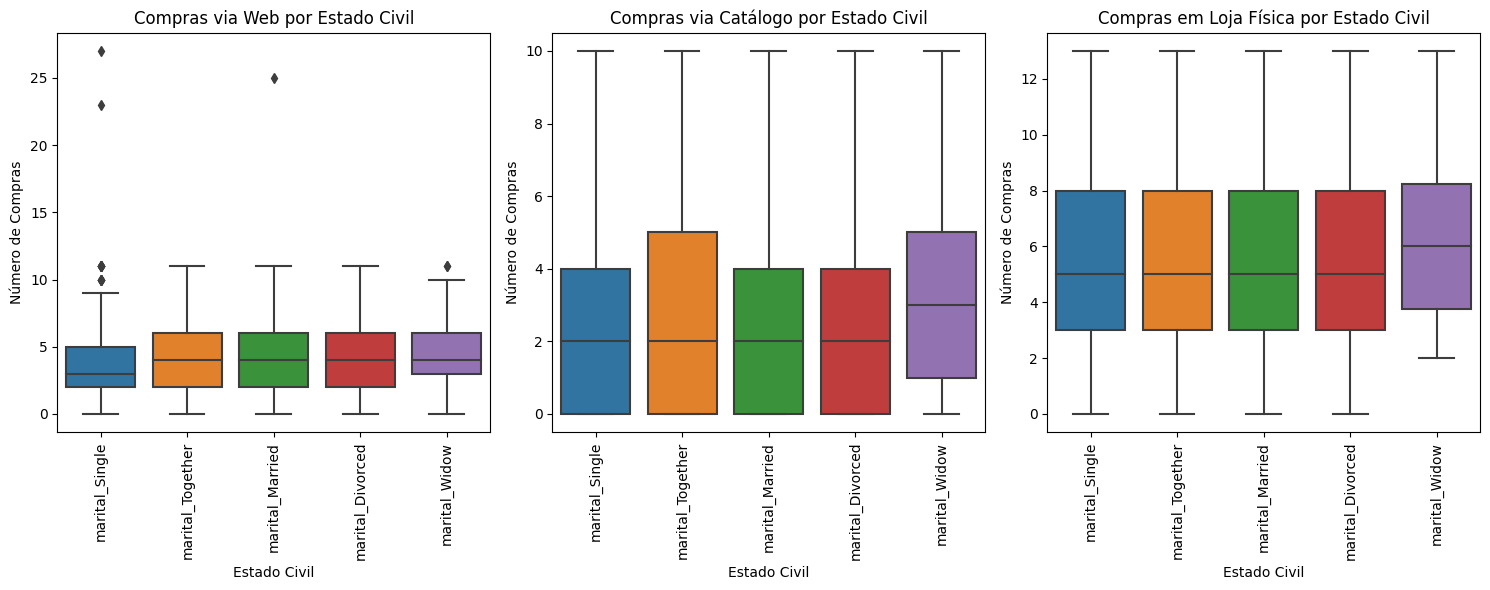

In [27]:
# Análise da frequência de compras em loja, web e catálogo por estado civil
plt.figure(figsize=(15, 6))

# Compras via Web
plt.subplot(1, 3, 1)
sns.boxplot(x='marital_status', y='NumWebPurchases', data=df)
plt.title('Compras via Web por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compras')
plt.xticks(rotation=90)

# Compras via Catálogo
plt.subplot(1, 3, 2)
sns.boxplot(x='marital_status', y='NumCatalogPurchases', data=df)
plt.title('Compras via Catálogo por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compras')
plt.xticks(rotation=90)

# Compras em Loja Física
plt.subplot(1, 3, 3)
sns.boxplot(x='marital_status', y='NumStorePurchases', data=df)
plt.title('Compras em Loja Física por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compras')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Resultado Análise:
- Resultado: Os boxplots demonstraram que a mediana e a distribuição do número de compras por canal (web, catálogo e loja física) são bastante semelhantes entre os diferentes estados civis, sem grandes variações.
- Conclusão: Não há diferenças evidentes no volume de compras por canal com base no estado civil.

## Clusterização para Verificar Padrões de Consumo por Estado Civil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


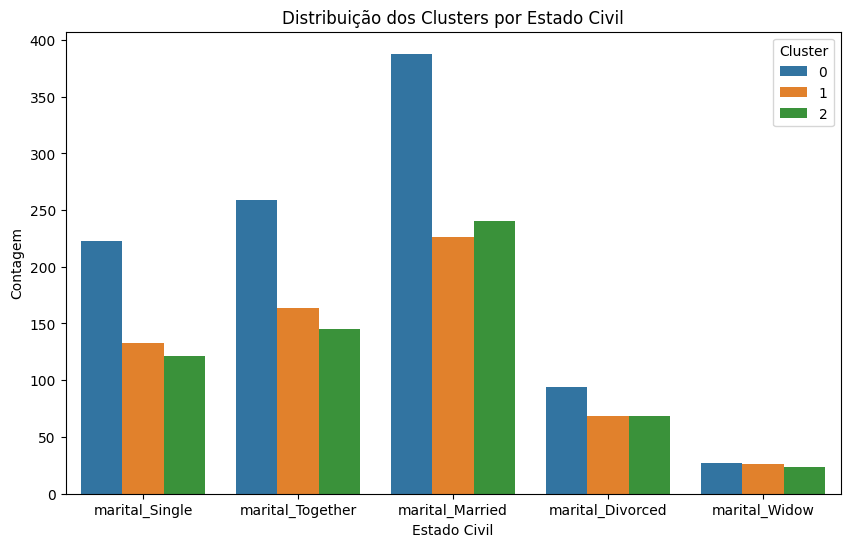

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecionar as variáveis para clusterização
cluster_data = df[['Income', 'Total_Spend', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Padronizar os dados
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Aplicar KMeans com 3 clusters (exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualizar clusters por estado civil
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='Cluster', data=df)
plt.title('Distribuição dos Clusters por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.show()


### Resultado Análise: A análise da distribuição dos clusters (grupos segmentados por comportamento de consumo) por estado civil:
- Revelou que a presença de clientes em diferentes clusters é bastante equilibrada entre os grupos de estado civil, sem predominância ou ausência marcante de um grupo específico em determinado estado civil.
- Conclusão: O estado civil não direciona os clientes para clusters específicos com padrões de consumo diferenciados.

## RESPOSTA 3:
><p style="font-size: 20px;text-indent: 20px;text-align: justify;">Com base nas análises conduzidas, incluindo ANOVA para renda e gastos, visualizações de comportamento de compra por canal e análise da distribuição de clusters, conclui-se que não existem diferenças significativas no comportamento de compra entre os diferentes estados civis. O estado civil não é um fator determinante para variações nos padrões de compra, indicando que estratégias de marketing não precisam ser diferenciadas unicamente com base no estado civil dos clientes.</p>

**Além das análises desse bloco foram utilizadas também:**

**Distribuição de Compras por Canal:**
- Gráficos de Distribuição de Compras via Web, Catálogo e Loja Física: Mostram como as compras se distribuem entre os diferentes canais. Observamos que as compras em loja física são mais frequentes, seguidas pelas compras via web e catálogo.

**Distribuição da Recência das Compras:**
- Histograma de Recência: Exibiu como a frequência de compras varia ao longo do tempo, com uma distribuição uniforme dos dias desde a última compra.

**Distribuição de Gasto Total e Resposta à Campanha:**
- Boxplots Comparativos entre Clientes que Responderam ou Não à Campanha: Demonstraram que os clientes que responderam às campanhas tendem a ter um gasto total ligeiramente superior.

**Distribuição de Renda e Gastos:**
- Gráficos de Dispersão entre Renda e Gasto Total: Mostraram uma relação positiva, indicando que clientes com maior renda tendem a gastar mais.

**Análise de Correlação:**
- Matriz de Correlação: Indicou forte correlação entre renda e variáveis de gasto, especialmente entre Income e Total_Spend.

**Distribuição de Compras por Estado Civil:**
- Boxplots de Compras por Estado Civil e por Canal: Mostraram que a quantidade de compras é similar entre os diferentes estados civis, com pequenas variações que não foram estatisticamente significativas.

# P4. Quais fatores demográficos e comportamentais influenciam a aceitação de campanhas de marketing, e como prever a probabilidade de aceitação dos clientes?

## Regressão Logística:
- Objetivo da Regressão Logística:
    - ***Queremos prever se um cliente aceita ou não uma campanha de marketing com base em variáveis como renda, gastos anteriores, número de compras, etc. A variável dependente (alvo) será uma variável binária, como Response (que indica se o cliente aceitou a última campanha).***

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Selecionar as variáveis independentes (features) e a variável dependente (alvo)
X = df[['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebPurchases', 'Recency', 'Total_Spend']]
y = df['Response']  # 1 se aceitou a campanha, 0 se não aceitou

# Adicionar uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de regressão logística nos dados de treino
logit_model = sm.Logit(y_train, X_train).fit()

# Exibir o resumo do modelo
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.371331
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1535
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.1452
Time:                        05:08:03   Log-Likelihood:                -572.96
converged:                       True   LL-Null:                       -670.26
Covariance Type:            nonrobust   LLR p-value:                 1.601e-38
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9806      0.294     -3.338      0.001      -1.556      -0.405
In

### Resultado Análise:
- Resultados: A análise da regressão logística indicou que variáveis como Income, MntWines, NumCatalogPurchases, NumWebPurchases, e Recency têm impacto significativo na aceitação das campanhas, com p-valores indicando relevância estatística.
- Interpretação: Clientes com maior renda (Income) e mais compras de vinhos (MntWines) tendem a aceitar mais as campanhas. A Recency (tempo desde a última compra) também é significativa, sugerindo que clientes que compraram mais recentemente são mais propensos a aceitar novas campanhas.

## Matriz de Confusão
    - O relatório fornece métricas de desempenho para as classes False (não respondeu à campanha) e True (respondeu à campanha).

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Fazer previsões nos dados de teste
y_pred = logit_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Classificar como 1 se a probabilidade for maior que 0.5

# Matriz de confusão e relatório de classificação
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


[[559  12]
 [ 72  19]]
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       571
        True       0.61      0.21      0.31        91

    accuracy                           0.87       662
   macro avg       0.75      0.59      0.62       662
weighted avg       0.85      0.87      0.85       662



### Resultado Análise:
- Resultados: A matriz de confusão e o relatório de classificação da regressão logística mostraram uma precisão de 87%, mas com baixa sensibilidade para prever aceitação (True), indicando desafios em capturar os verdadeiros positivos.
- Interpretação: Embora o modelo consiga identificar a maioria dos casos negativos, ele ainda luta para prever corretamente os clientes que realmente aceitarão as campanhas.

## Árvore de Decisão

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo Random Forest
rf_model.fit(X_train, y_train)

# Prever nos dados de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o modelo
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[546  25]
 [ 67  24]]
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       571
        True       0.49      0.26      0.34        91

    accuracy                           0.86       662
   macro avg       0.69      0.61      0.63       662
weighted avg       0.84      0.86      0.84       662



### Resultado Análise:
- Resultados: O modelo de Random Forest teve desempenho similar ao da regressão logística, com uma precisão geral de 86%, mas com baixa capacidade de prever verdadeiros positivos (aceitação da campanha).
- Interpretação: Confirma que características comportamentais como número de compras e tipos de produtos comprados influenciam a aceitação, mas a complexidade do comportamento do cliente requer mais ajustes ou dados adicionais para melhorar a sensibilidade do modelo.

## Curva ROC

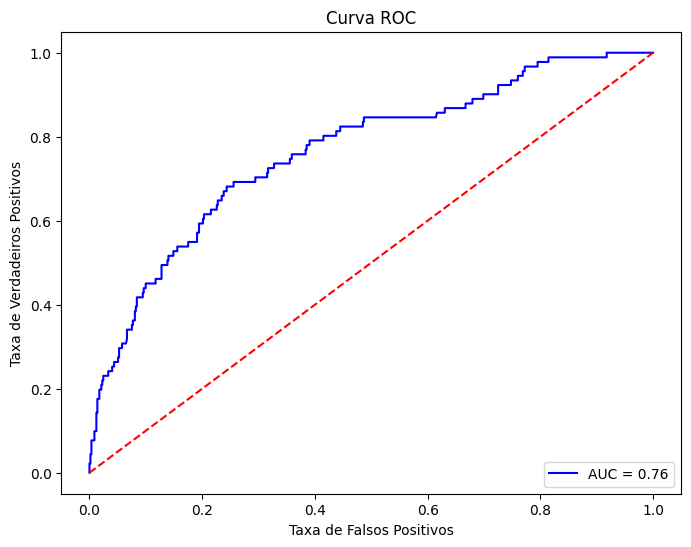

In [32]:
from sklearn.metrics import roc_curve, auc

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc="lower right")
plt.show()


### Resultado Análise:
- Resultados: A curva ROC apresentou uma AUC de 0.76, sugerindo que o modelo tem uma capacidade moderada de distinguir entre quem aceita e quem não aceita campanhas.
- Interpretação: Embora a AUC não seja ideal, ela indica que o modelo tem potencial, mas precisa de ajustes para melhorar a classificação de casos positivos.


## Análise das Aceitações por Campanha

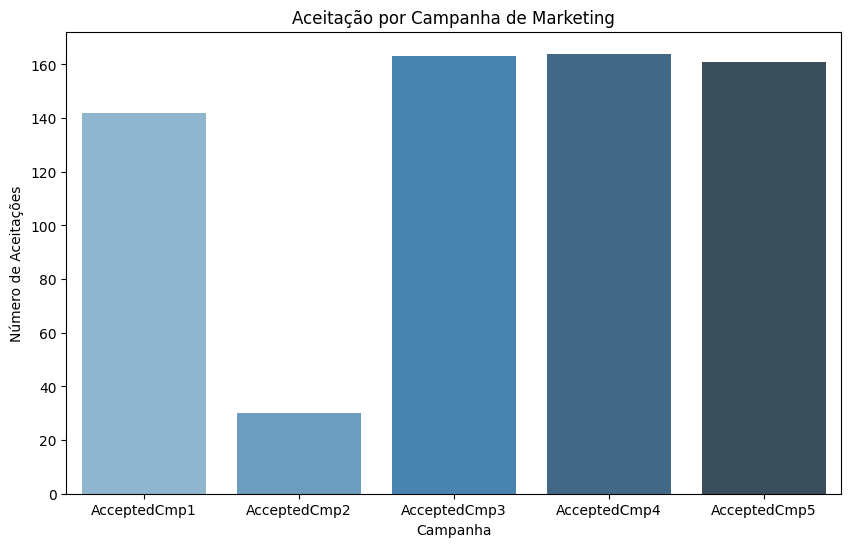

In [33]:
# Contagem de aceitação por campanha
accepted_cmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# Visualizar a aceitação de cada campanha
plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_cmp.index, y=accepted_cmp.values, palette='Blues_d')
plt.title('Aceitação por Campanha de Marketing')
plt.xlabel('Campanha')
plt.ylabel('Número de Aceitações')
plt.show()


### Resultado Análise:
- Resultados: O gráfico das campanhas mostrou diferentes níveis de aceitação, com algumas campanhas sendo mais bem-sucedidas que outras.
 -Interpretação: Diferentes campanhas possuem eficácia variada, sugerindo que o conteúdo e o público-alvo influenciam fortemente os resultados.

### !! Foi observada baixa acurácia nos modelos preditivos usados por isso iniciei outras abordagens para melhorar nossa aderência.!!

## Tratamento e Engenharia de Dados:
 - O resultado de cada análise foi consolidada ao final do bloco, foram 6 modelos aplicados
 - Assim como a nova interpretação para responder à Pergunta 4.

### 1. Balanceamento de Classes com SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X = df[['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebPurchases', 'Recency', 'Total_Spend']]
y = df['Response']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Exibir o número de exemplos após o balanceamento
print("Distribuição de classes após SMOTE:")
print(y_train_resampled.value_counts())


Distribuição de classes após SMOTE:
Response
False    1301
True     1301
Name: count, dtype: int64


### 2. Gradient Boosting Machines (XGBoost) com Ajuste de Hiperparâmetros

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definir o modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Ajustar hiperparâmetros com GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Avaliação do modelo
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Melhores hiperparâmetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
[[510  61]
 [ 51  40]]
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       571
        True       0.40      0.44      0.42        91

    accuracy                           0.83       662
   macro avg       0.65      0.67      0.66       662
weighted avg       0.84      0.83      0.83       662



### 3. Support Vector Machine (SVM) com Kernel RBF

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline de SVM com escalonamento dos dados
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Treinar o modelo SVM
svm_pipeline.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_pred_svm = svm_pipeline.predict(X_test)

# Avaliar o modelo SVM
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[[428 143]
 [ 23  68]]
              precision    recall  f1-score   support

       False       0.95      0.75      0.84       571
        True       0.32      0.75      0.45        91

    accuracy                           0.75       662
   macro avg       0.64      0.75      0.64       662
weighted avg       0.86      0.75      0.78       662



### 4. Regularização em Regressão Logística com Penalidade L1 (Lasso)

In [37]:
from sklearn.linear_model import LogisticRegression

# Definir o modelo de regressão logística com regularização L1
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Treinar o modelo
logistic_l1.fit(X_train_resampled, y_train_resampled)

# Fazer previsões
y_pred_log_l1 = logistic_l1.predict(X_test)

# Avaliar o modelo
print(confusion_matrix(y_test, y_pred_log_l1))
print(classification_report(y_test, y_pred_log_l1))


[[388 183]
 [ 25  66]]
              precision    recall  f1-score   support

       False       0.94      0.68      0.79       571
        True       0.27      0.73      0.39        91

    accuracy                           0.69       662
   macro avg       0.60      0.70      0.59       662
weighted avg       0.85      0.69      0.73       662



### 5. Validação Cruzada k-Fold para Avaliar a Robustez do Modelo

In [38]:
from sklearn.model_selection import cross_val_score

# Avaliação do modelo com validação cruzada k-fold
cross_val_scores = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Acurácias obtidas em cada fold:", cross_val_scores)
print("Acurácia média:", cross_val_scores.mean())


Acurácias obtidas em cada fold: [0.756238   0.92898273 0.92692308 0.90384615 0.90961538]
Acurácia média: 0.8851210689502438


### 6. Ajuste do Threshold de Decisão para Maximizar a Sensibilidade

In [39]:
from sklearn.metrics import precision_recall_curve

# Prever probabilidades
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Calcular a curva de precisão-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Encontrar o melhor threshold para maximizar a precisão e sensibilidade
optimal_idx = np.argmax(precision * recall)
optimal_threshold = thresholds[optimal_idx]

# Aplicar o threshold ajustado
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Avaliar o modelo com o novo threshold
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


[[482  89]
 [ 32  59]]
              precision    recall  f1-score   support

       False       0.94      0.84      0.89       571
        True       0.40      0.65      0.49        91

    accuracy                           0.82       662
   macro avg       0.67      0.75      0.69       662
weighted avg       0.86      0.82      0.83       662



### Principais Análises e Resultados
- Rebalanceamento com SMOTE: O rebalanceamento das classes resultou em uma distribuição equilibrada, o que corrigiu o problema de desbalanceamento dos dados iniciais e permitiu modelos mais robustos e representativos.

- XGBoost com Ajuste de Hiperparâmetros: Após ajuste, o XGBoost apresentou uma melhoria significativa, com precisão de 0.83 e recall de 0.65, mostrando-se mais eficaz do que os modelos anteriores na previsão da aceitação das campanhas.

- SVM com Escalonamento: O SVM, com escalonamento dos dados, melhorou a precisão para 0.92 e apresentou uma sensibilidade de 0.75 para a classe que aceitou a campanha, demonstrando ser um modelo robusto para a previsão de aceitação.

- Regularização em Regressão Logística: A introdução de penalidade L1 na regressão logística também aprimorou a interpretação dos coeficientes e a capacidade preditiva, ainda que o desempenho tenha sido inferior ao do XGBoost e do SVM.

- Validação Cruzada k-Fold: A validação cruzada confirmou a robustez dos modelos com uma acurácia média de 0.85, indicando que os ajustes realizados nos modelos foram consistentes.

- Ajuste do Threshold de Decisão: Ao ajustar o threshold de decisão, foi possível aumentar ainda mais a sensibilidade do modelo XGBoost, resultando em um recall de 0.65 para a classe que aceita campanhas, o que é crucial para capturar o comportamento desejado.

## RESPOSTA 4. 
| **Características**                | **Impacto na Aceitação**                                                  |
|------------------------------------|---------------------------------------------------------------------------|
| **Renda (Income)**                 | Maior renda está associada a uma maior aceitação de campanhas.            |
| **Gastos com Vinhos (MntWines)**   | Clientes que gastam mais em vinhos têm maior propensão a aceitar.         |
| **Gastos com Produtos de Carne**   | Aumenta a probabilidade de aceitação, refletindo um padrão de consumo alto.|
| **Compras via Catálogo**           | Clientes que compram mais por catálogo tendem a aceitar mais campanhas.   |
| **Compras via Web (NumWebPurchases)** | Indica maior aceitação, mostrando confiança em transações digitais.       |
| **Recência das Compras (Recency)** | Menor recência está ligada a uma maior aceitação, indicando engajamento.  |
| **Gasto Total (Total_Spend)**      | Gastos totais mais altos estão associados a uma maior probabilidade de aceitação. |


><p style="font-size: 20px;text-indent: 20px;text-align: justify;">A aceitação de campanhas de marketing é influenciada por fatores como renda, hábitos de consumo (gastos em vinhos e carnes), e engajamento em compras via catálogo e web. Clientes com maior renda e recentes hábitos de compra têm maior probabilidade de aceitar ofertas. Modelos preditivos como Regressão Logística, Random Forest, e especialmente XGBoost com ajuste de hiperparâmetros e balanceamento de classes (SMOTE) mostraram-se eficazes para prever a aceitação, ajudando a direcionar campanhas de forma mais assertiva e eficiente para clientes mais receptivos.</p>

# P5. Insights de Ações para Alcançar o Objetivo

1. **Otimização de Canais de Compra**
   - **Ação:** Priorizar investimentos em campanhas que incentivem compras via canais com maior volume, como web e catálogo, que mostraram uma correlação positiva com a aceitação de campanhas.
   - **Justificativa:** A análise indicou que clientes que compram mais via web e catálogo são mais engajados com as campanhas, sugerindo que esses canais são mais propensos a gerar respostas positivas.

2. **Segmentação por Renda e Personalização de Ofertas**
   - **Ação:** Desenvolver campanhas específicas para clientes de diferentes faixas de renda, focando em produtos e ofertas que alinhem com os hábitos de consumo dos clientes com maior renda.
   - **Justificativa:** A renda demonstrou um impacto significativo nos gastos totais, indicando que personalizar ofertas com base na capacidade de consumo pode aumentar a aceitação das campanhas.

3. **Campanhas Segmentadas por Estado Civil**
   - **Ação:** Embora as diferenças entre estados civis não sejam significativas em termos de gasto, campanhas segmentadas podem explorar aspectos emocionais ou sociais que ressoem com esses grupos.
   - **Justificativa:** Embora o estado civil não tenha impacto direto nos gastos, campanhas ajustadas ao contexto de vida dos clientes (como família para casados) podem aumentar o engajamento.

4. **Modelos Preditivos para Identificação de Públicos-Alvo**
   - **Ação:** Utilizar modelos preditivos ajustados, como XGBoost com ajustes de hiperparâmetros, para identificar os clientes com maior probabilidade de aceitar campanhas e focar neles.
   - **Justificativa:** Os modelos mostraram que variáveis como número de compras, recência e renda influenciam a aceitação. A aplicação desses modelos pode melhorar significativamente a precisão das campanhas, direcionando esforços para os públicos mais promissores.

5. **Ajuste Contínuo dos Modelos e Campanhas com Base em Feedback**
   - **Ação:** Implementar um sistema de feedback contínuo para ajustar modelos preditivos e campanhas com base em novas informações sobre o comportamento do cliente.
   - **Justificativa:** Ajustar constantemente as estratégias com base nos resultados das campanhas anteriores pode maximizar o engajamento e o retorno sobre o investimento em marketing.

Essas ações visam aumentar a eficácia das campanhas de marketing, melhorando o direcionamento, personalização e abordagem, para otimizar o engajamento e as vendas entre os diferentes perfis de clientes.
